In [21]:
%matplotlib nbagg
import matplotlib.pyplot as plt
import numpy as np
from subprocess import PIPE, Popen

In [63]:
cmd = 'g++ main.cpp CHR_PRP.cpp -c -std=c++14'
subprocess.Popen(cmd, shell=True)

cmd = 'g++ main.o CHR_PRP.o -o DoIt'
subprocess.Popen(cmd, shell=True)

cmd = './DoIt'
subprocess.Popen(cmd, shell=True)

<IPython.core.display.Javascript object>


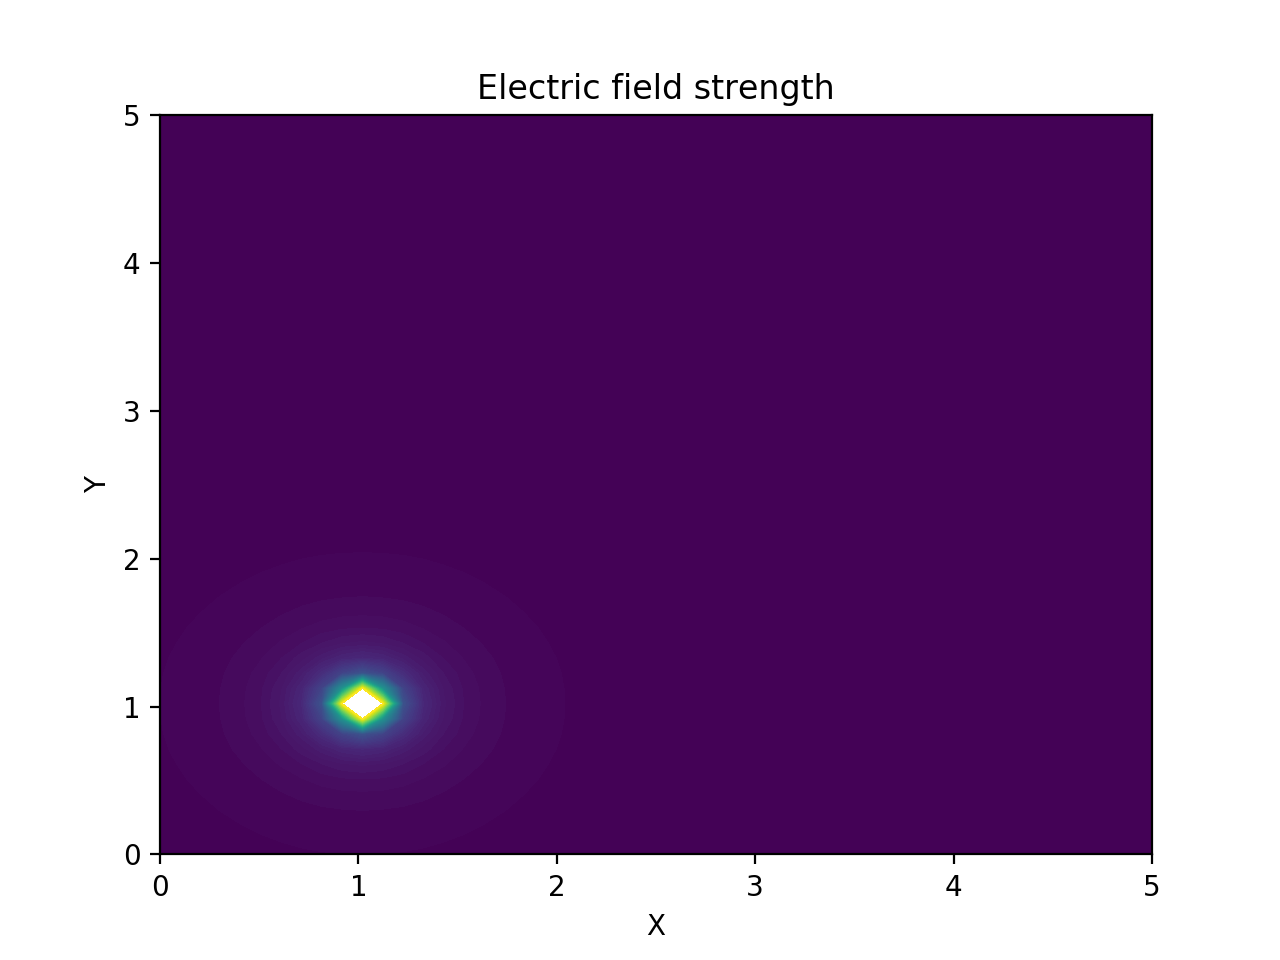

In [64]:
with open("output.txt") as read:
    read.readline()
    a = read.readline()
    a = a.split()
    lenght_x = float(a[2])
    a = read.readline()
    a = a.split()
    lenght_y = float(a[2])
    a = read.readline()
    a = a.split()
    dimensional = int(a[2])
    read.readline()
    a = read.readline()
    a = a.split()
    position_x = float(a[2])
    a = read.readline()
    a = a.split()
    position_y = float(a[2])
    a = read.readline()
    a = a.split()
    charge_value = float(a[2])
    
    for line in read:
        if line == "Data:\n":
            a = read.readline()

a = a.split()

data = np.zeros((dimensional, dimensional), float)

for i, value in enumerate(a):
    a[i] = float(value)

i = 0
j = 0
for k, value in enumerate(a):
    i = int(k%dimensional)
    j = int(k/dimensional)
    data[i][j] = float(value)


X = np.linspace(0, lenght_x, dimensional)
Y = np.linspace(0, lenght_y, dimensional)

plt.figure()


plt.title("Electric field strength")
plt.xlabel('X')
plt.ylabel('Y')
plt.contourf(X, Y, data, 100)

# plt.subplot(212)
# plt.title("Electric field strength")
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.contour(X,Y, data, 100, corner_mask = True)

<IPython.core.display.Javascript object>


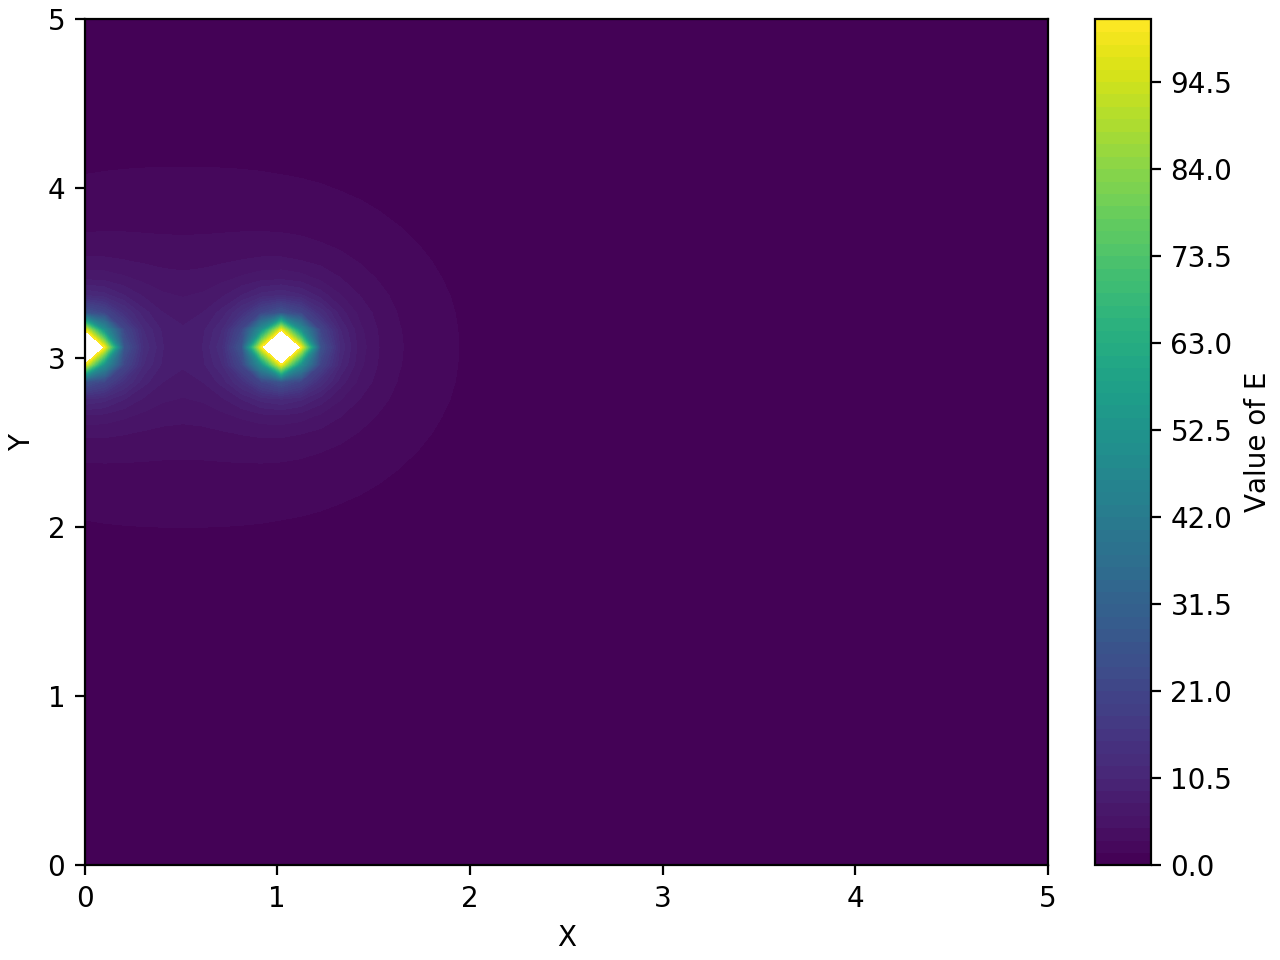

Text(0, 0.5, 'Value of E')

In [56]:
fig, ax = plt.subplots(constrained_layout = True)
CS = ax.contourf(X,Y, data, 100, origin = 'lower')
ax.set_xlabel('X')
ax.set_ylabel('Y')
cbar = fig.colorbar(CS)
cbar.ax.set_ylabel('Value of E')